# Goals
Optimasi Campaign Result terkait penawaran produk baru, sehingga mendapatkan profit yang maximal untuk bulan depan serta memahami karakteristik customers yang menerima penawaran produk baru tersebut.

# Data Quality Check 
- Q1 : Apakah ada features yang type-data nya tidak sesuai atau adakah variasi input values dalam data? e.g. 2,5$, etc ??
- Q2 : Adakah duplicate,missing values atau outliers? Bagaimana cara handlingnya?
- Q3 : Apakah ada distribusi yang tidak masuk akal?

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', palette='Spectral', context='notebook')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [266]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [267]:
df.shape

(2240, 28)

## Question 1

Q1 : Apakah ada features yang type-data nya tidak sesuai?


In [268]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

""


**Insight**

- Income dtype must be float or int
- Dt_Customer dtype must be date


In [269]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'float64' or dtype == 'int64':
        print(col, dtype)
        print(df[col].min(), df[col].max(), df[col].mean())
    else:
        print(col,dtype)
        print(df[col].unique())
    print()

ID int64
0 11191 5592.159821428571

Year_Birth int64
1893 1996 1968.8058035714287

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2 0.44419642857142855

Teenhome int64
0 2 0.50625

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11

In [270]:
# Membersihkan nama columns yang memiliki spasi
df.columns = df.columns.str.replace(' ', '')

In [271]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [272]:
df.Income = df.Income.str.replace('$', '')
df.Income = df.Income.str.replace(',', '')
df.Income = df.Income.astype('float')

In [273]:
df.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [274]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [275]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

## Question 2
- Adakah duplicate,missing values atau outliers? Bagaimana cara handlingnya?


In [276]:
df.duplicated().sum()

0

In [277]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

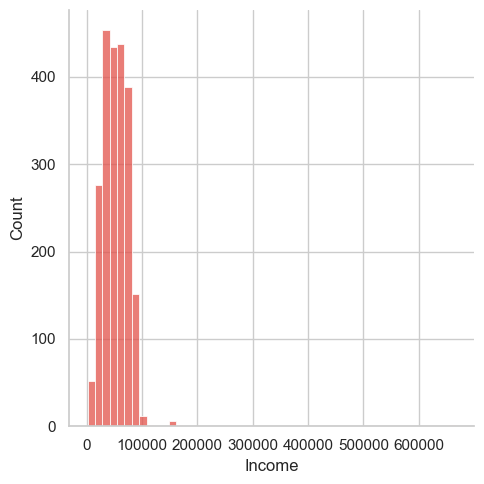

In [278]:
sns.displot(df['Income'], kde=False, bins=50)

<Axes: >

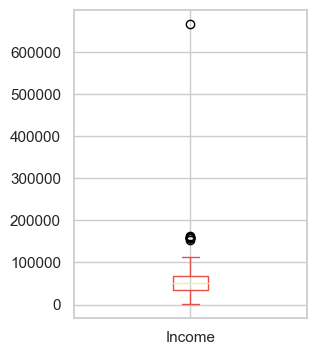

In [279]:
df['Income'].plot(kind='box', figsize=(3, 4))

**Insight**

karena terdapat outlier maka strategi handling missing values mengunakan median

In [280]:
df['Income']=df['Income'].fillna(df['Income'].median())

### Outliers

Pilih kolom fitur yang bertipe continues

In [281]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'],inplace=True)

Year_Birth                Axes(0.125,0.712609;0.168478x0.167391)
Income                 Axes(0.327174,0.712609;0.168478x0.167391)
Kidhome                Axes(0.529348,0.712609;0.168478x0.167391)
Teenhome               Axes(0.731522,0.712609;0.168478x0.167391)
Recency                   Axes(0.125,0.511739;0.168478x0.167391)
MntWines               Axes(0.327174,0.511739;0.168478x0.167391)
MntFruits              Axes(0.529348,0.511739;0.168478x0.167391)
MntMeatProducts        Axes(0.731522,0.511739;0.168478x0.167391)
MntFishProducts            Axes(0.125,0.31087;0.168478x0.167391)
MntSweetProducts        Axes(0.327174,0.31087;0.168478x0.167391)
MntGoldProds            Axes(0.529348,0.31087;0.168478x0.167391)
NumDealsPurchases       Axes(0.731522,0.31087;0.168478x0.167391)
NumWebPurchases               Axes(0.125,0.11;0.168478x0.167391)
NumCatalogPurchases        Axes(0.327174,0.11;0.168478x0.167391)
NumStorePurchases          Axes(0.529348,0.11;0.168478x0.167391)
NumWebVisitsMonth        

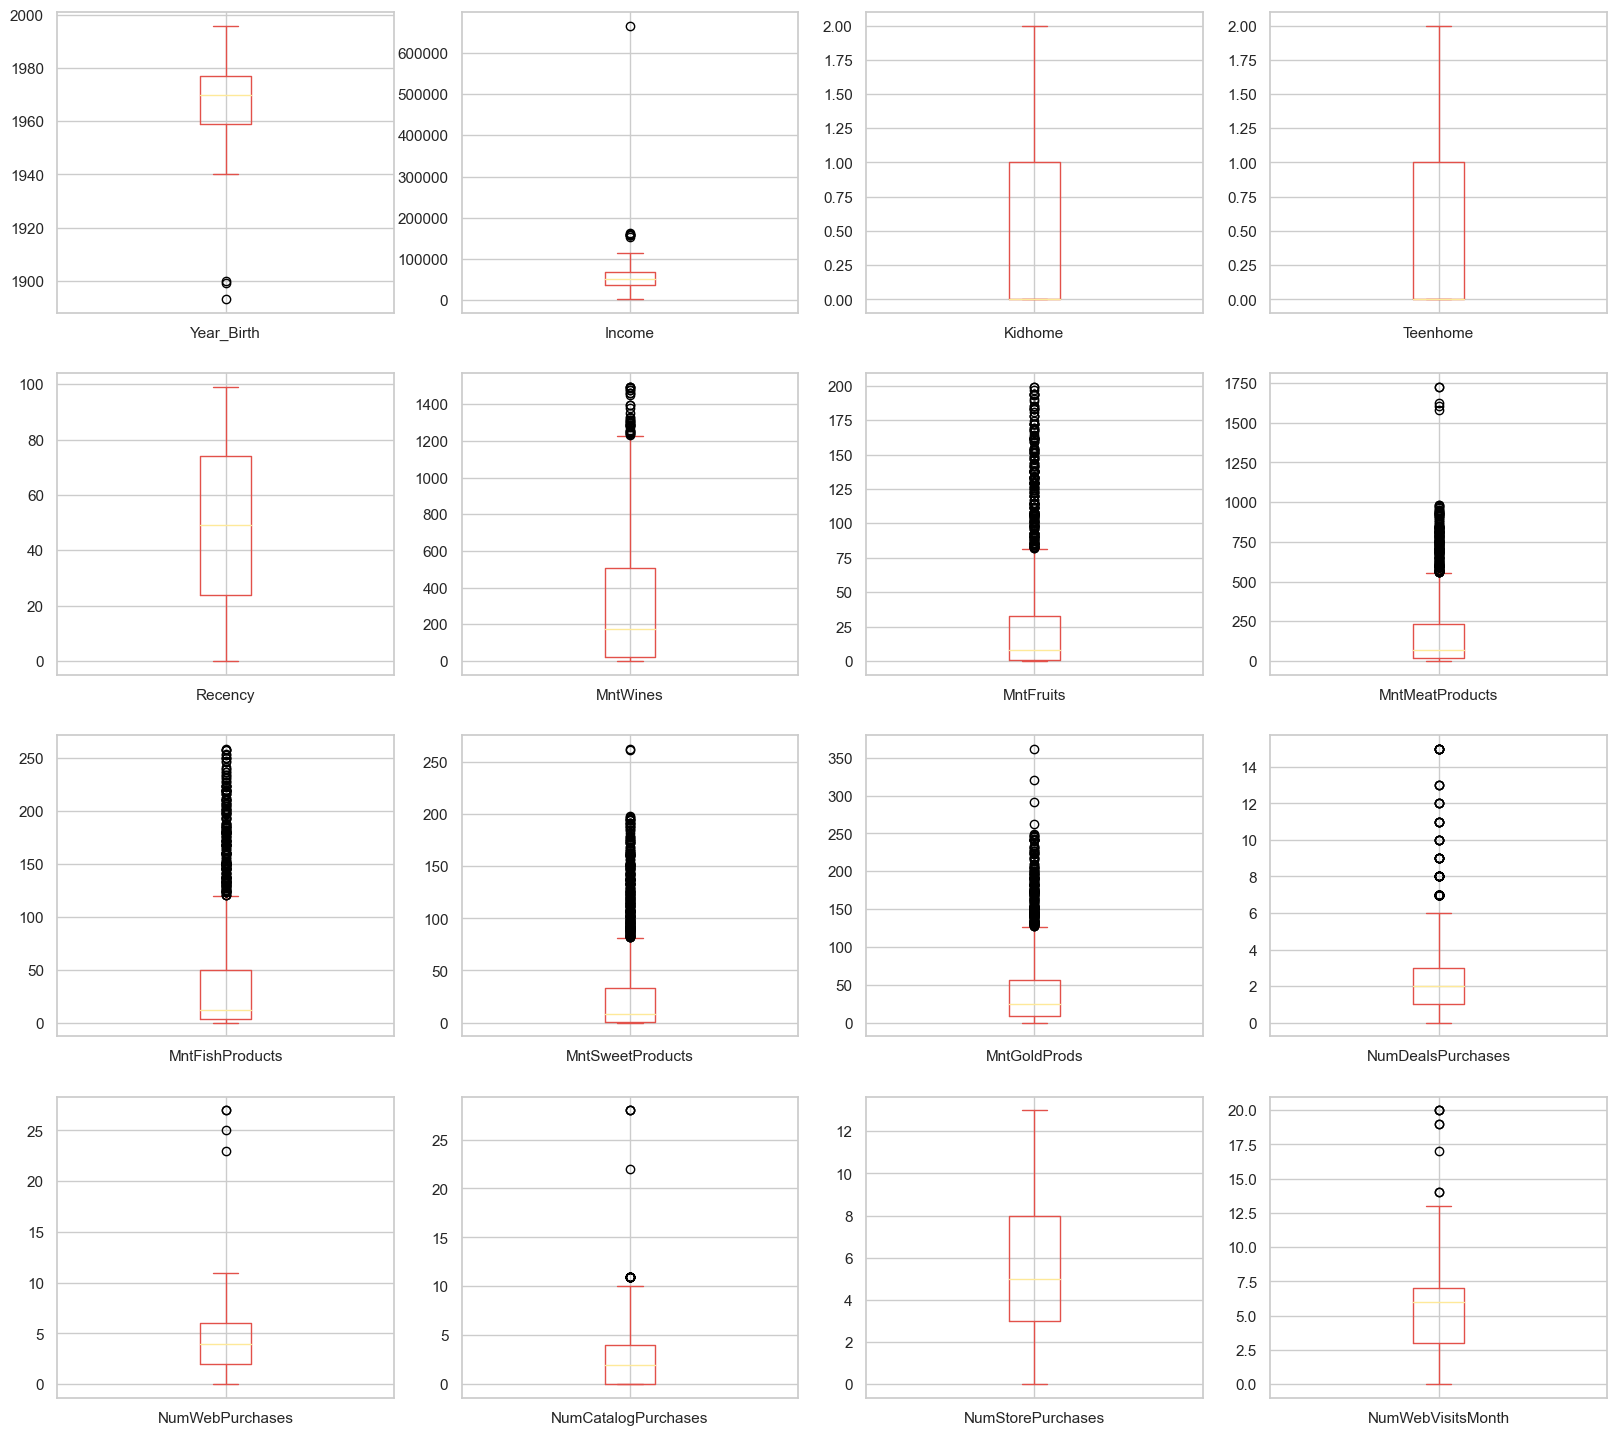

In [282]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(20, 18))

**Insight**
Terdapat outlier yang paling tidak masuk akal pada kolom birthyear di mana hal tersebut menunjukkan tahun kelahiran dibawah tahun 1940

In [283]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

Year_Birth    Axes(0.125,0.712609;0.168478x0.167391)
dtype: object

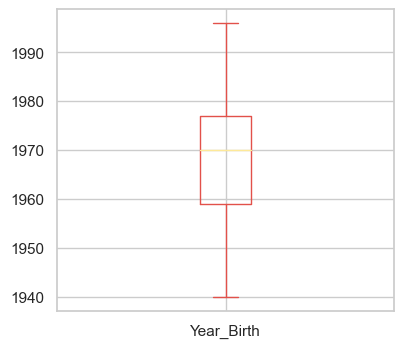

In [284]:
df['Year_Birth'].plot(subplots=True, layout=(4,4), kind='box', figsize=(20, 18))

## Question 3
Apakah ada distribusi yang tidak masuk akal?

In [285]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>],
       [<Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

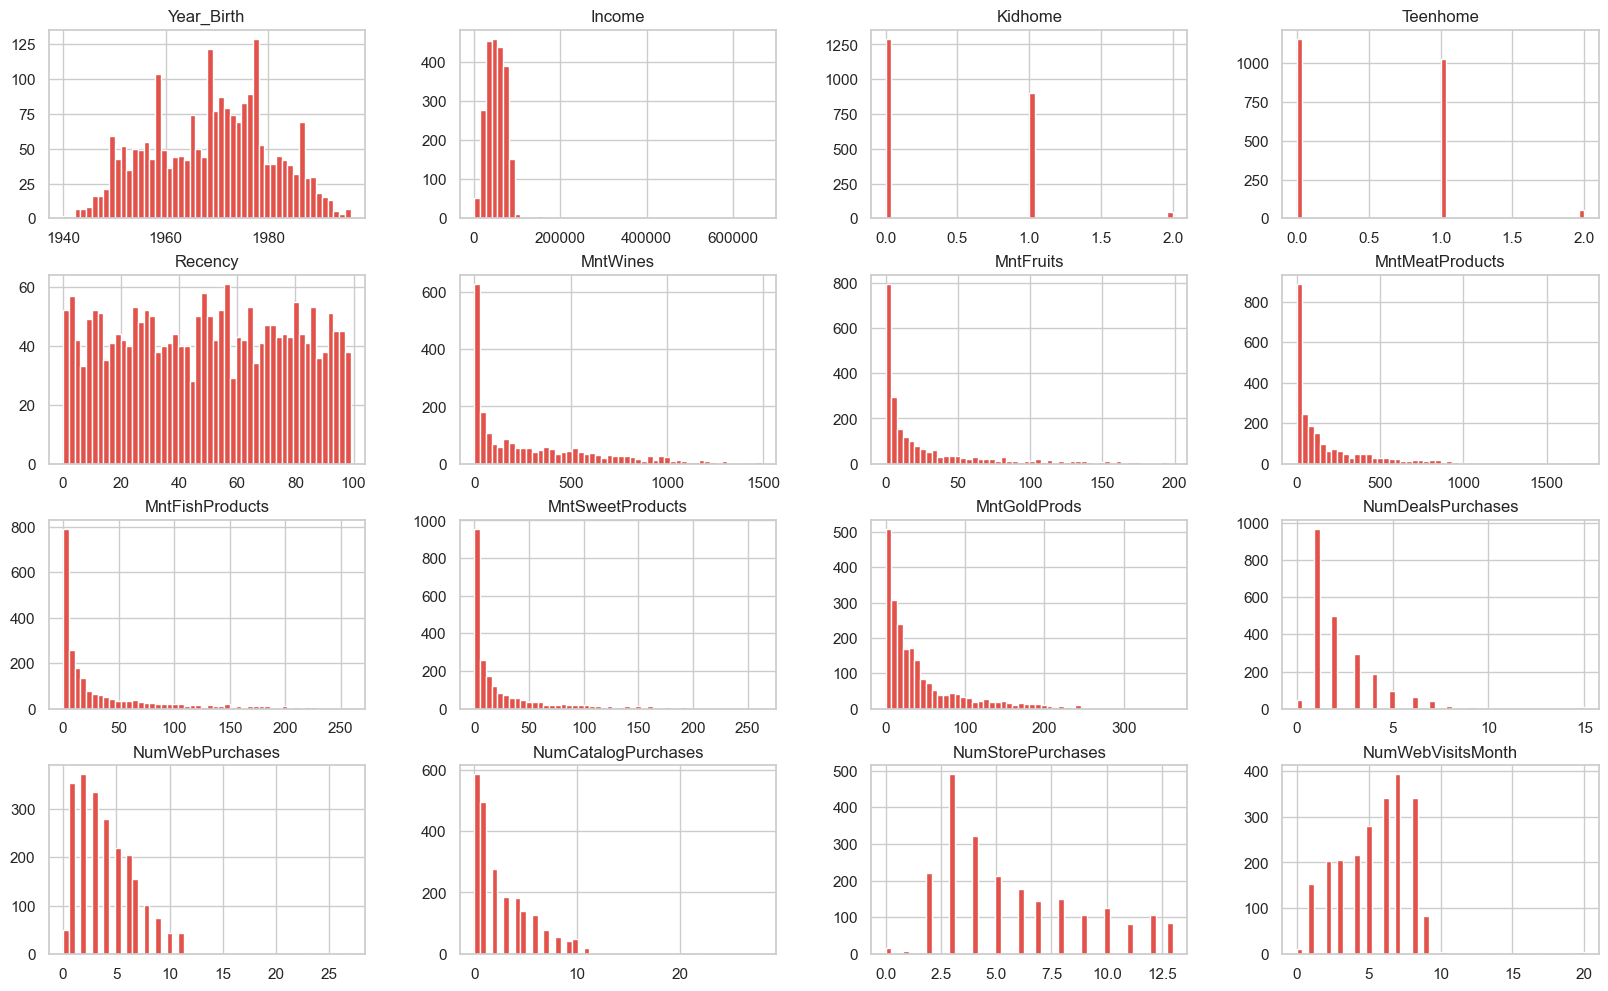

In [286]:
fig = plt.figure(figsize=(20, 12))
ax = plt.gca()

df.hist(ax=ax, bins=50, column=numeric, layout=(4,4))

**Insight**

All numeric data looks fine ! :D

# EDA (Exploratory Data Analysis)

**Gathering data Insight**

In [287]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Year Birth

In [288]:
df['Year_Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2232    1976
2233    1977
2234    1976
2235    1978
2236    1969
Name: Year_Birth, Length: 2237, dtype: int64

In [289]:
df['Age_Customer'] = df['Dt_Customer'].dt.year - df['Year_Birth']

<Axes: xlabel='Age_Customer', ylabel='Count'>

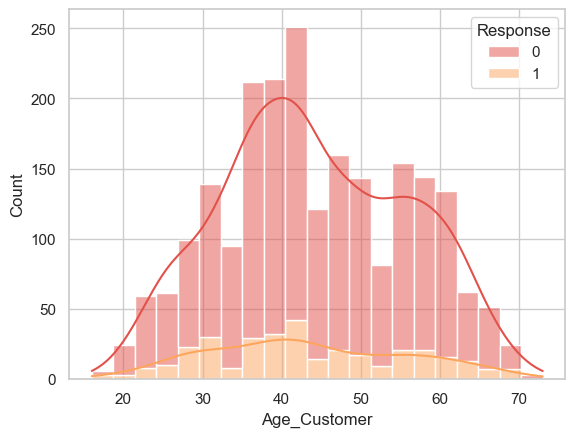

In [290]:
sns.histplot(data=df, x='Age_Customer', hue='Response', multiple='stack', kde=True)

## Education

In [291]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [292]:
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) in ['2n Cycle'] else str(x))

<Axes: xlabel='Education', ylabel='count'>

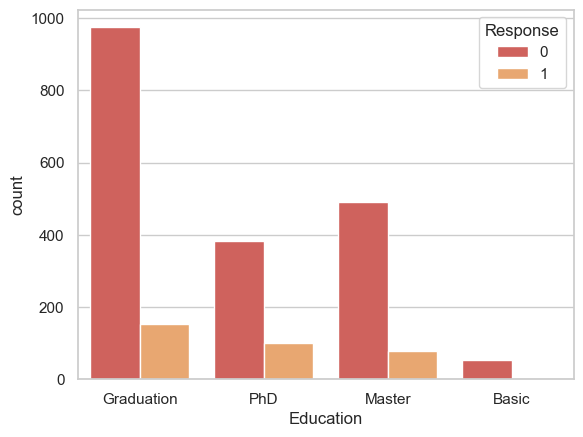

In [293]:
sns.countplot(data=df, x='Education', hue='Response')

In [294]:
def barPercentage(df, xVar, ax):
    '''
    barPercentage() : Menambahkan persentase di atas bar plot
    args:
    ax : axis plot
    df : dataframe
    xVar : variable di sumbu x
    '''
    # 1. How many X Categroies
    ## Check for NaN and Remove
    numX = len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, so we need to get the hue order
    bars = ax.patches
    ## 2a. For each X Variables
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##      ex. 8x categories, 4 hues => [0, 8, 16, 24] are hue bars for 1st x category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the Total Height of the X variable (for percentage)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

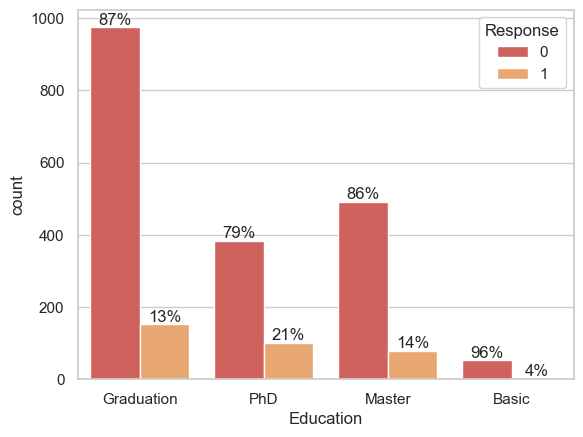

In [295]:
ax = sns.countplot(data=df, x='Education', hue='Response')
barPercentage(df, 'Education', ax)

**Conclusion**

PhD memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

## Income

(0.0, 175000.0)

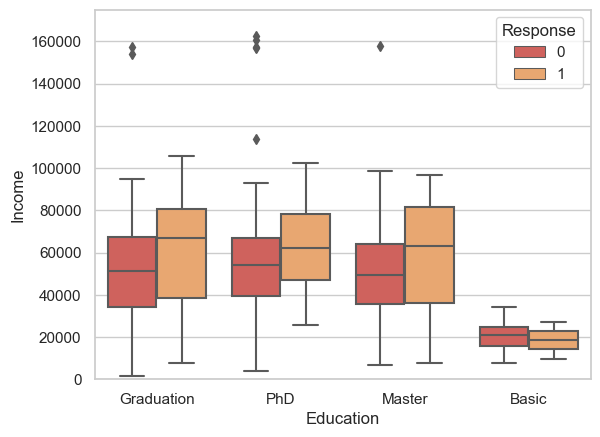

In [296]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

**Conclusion**

Berdasarkan korelasi antara education dengan income, dapat dilihat bahwa income yang lebih tinggi lebih berpotensi menerima penawaran 

## Marital Status

In [297]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [298]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'Absurd', 'YOLO'] else str(x))

In [299]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

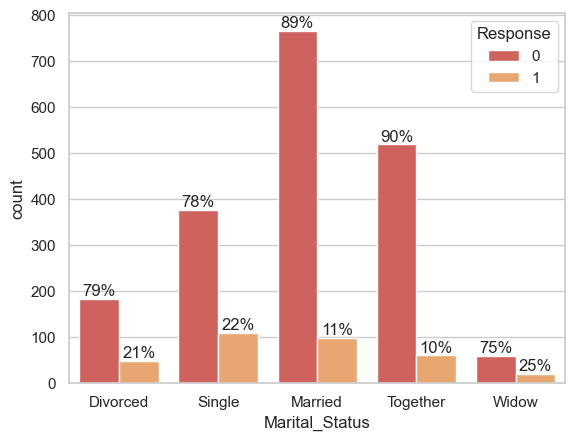

In [300]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Response')
barPercentage(df, 'Marital_Status', ax)

**Conclusion**

Ada kecenderungan jika customer membiyayai hidup sendiri lebih berpotensi menerima penawaran campaign

## KidHome + TeenHome

In [301]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [302]:
# Melihat jumlah tanggunan (anak)
df['NumberOfDependents'] = df['Kidhome'] + df['Teenhome']

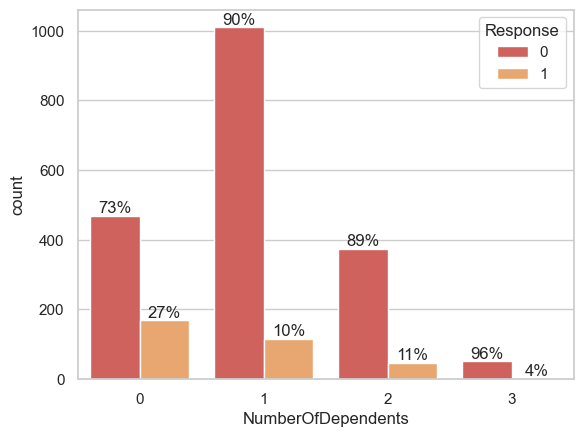

In [303]:
ax = sns.countplot(data=df, x='NumberOfDependents', hue='Response')
barPercentage(df, 'NumberOfDependents', ax)

**Conclusion**

Customer yang memiliki tanggungan anak lebih sedikit lebih berpotensi untuk menerima penawaran campaign

## Customer Join Data (DtCustomer)

In [304]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

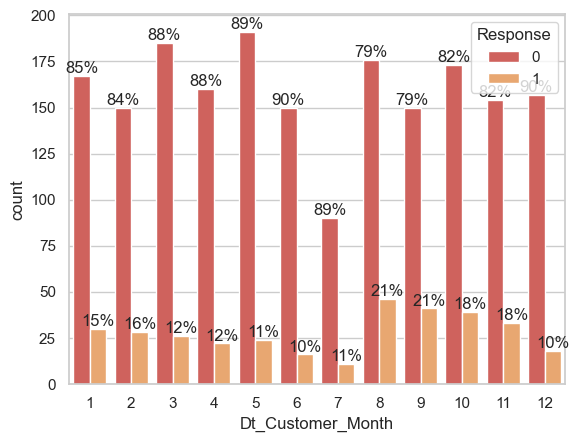

In [305]:
ax = sns.countplot(data=df, x='Dt_Customer_Month', hue='Response')
barPercentage(df, 'Dt_Customer_Month', ax)

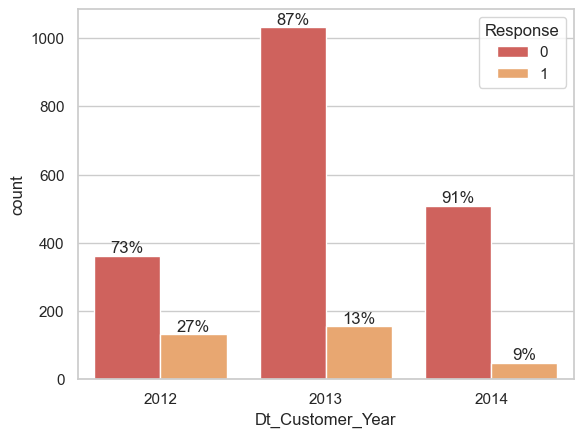

In [306]:
ax = sns.countplot(data=df, x='Dt_Customer_Year', hue='Response')
barPercentage(df, 'Dt_Customer_Year', ax)

**Conclusion**

Semakin lama customer sudah join maka semakin besar kemungkinan customer akan menerima penawaran campaign

## Recency

<Axes: xlabel='Recency', ylabel='Count'>

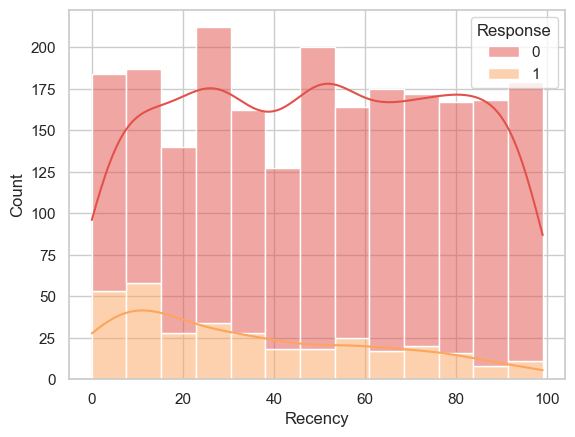

In [307]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

**Conclusion**

Customer yang belum lama membeli, maka cenderung akan menerima penawaran campaign terbaru

## Amount spent

In [308]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [309]:
df[amt_spent_features].corr()['Response'].sort_values(ascending=False)

Response            1.000000
MntWines            0.247392
MntMeatProducts     0.236640
MntGoldProds        0.140693
MntFruits           0.125904
MntSweetProducts    0.117366
MntFishProducts     0.111415
Name: Response, dtype: float64

In [310]:
df[amt_spent_features]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
0,189,104,379,111,189,218,1
1,464,5,64,7,0,37,1
2,134,11,59,15,2,30,0
3,10,0,1,0,0,0,0
4,6,16,24,11,0,34,1
...,...,...,...,...,...,...,...
2232,372,18,126,47,48,78,0
2233,5,10,13,3,8,16,0
2234,185,2,88,15,5,14,0
2235,267,38,701,149,165,63,0


In [311]:
df['Total_Amount_Spent'] = df[amt_spent_features].sum(axis=1)

<Axes: xlabel='Total_Amount_Spent', ylabel='Count'>

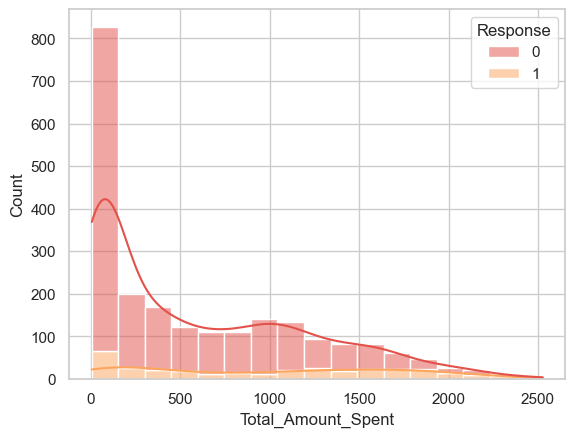

In [312]:
sns.histplot(data=df, x='Total_Amount_Spent', hue='Response', multiple='stack', kde=True)

**Conclusion**

Jika customer has spent money for 1000$ - 2000$ maka customer ini akan cenderung menerima penawaran campaign

In [407]:
sns.countplot(data=df, x='Education', hue='Response')

ValueError: Could not interpret value `Total_Amount_Spent` for parameter `x`

## purchases

In [313]:
purchase_features = [ c for c in df.columns if 'Purchases' in str(c)]
purchase_features.append('Response')

In [314]:
df[purchase_features].corr()['Response'].sort_values(ascending=False)

Response               1.000000
NumCatalogPurchases    0.220894
NumWebPurchases        0.148453
NumStorePurchases      0.038855
NumDealsPurchases      0.001854
Name: Response, dtype: float64

In [315]:
df['Total_purchases'] = df[purchase_features].sum(axis=1)

<Axes: xlabel='Total_purchases', ylabel='Count'>

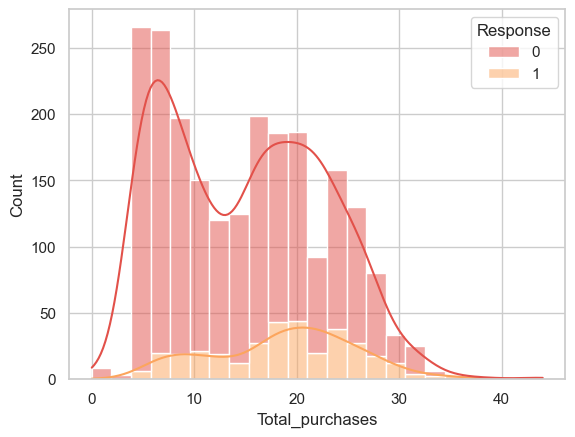

In [316]:
sns.histplot(data=df, x='Total_purchases', hue='Response', multiple='stack', kde=True)

**Conclusion**

Tidak ada pola unik atau pemisah antara response 0 dan 1 (pola berbeda pada dikotomi response)

## Number Web Visit Num

In [317]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


**Conclusion**

Tidak memiliki korelasi dengan responses

## Previous Campaign

In [318]:
pref_cmp = [ c for c in df.columns if 'AcceptedCmp' in str(c)]
pref_cmp.append('Response')

In [319]:
df[pref_cmp].corr()['Response'].sort_values(ascending=False)

Response        1.000000
AcceptedCmp5    0.328182
AcceptedCmp1    0.293882
AcceptedCmp3    0.254144
AcceptedCmp4    0.176890
AcceptedCmp2    0.169249
Name: Response, dtype: float64

## Complain

In [320]:
df[['Complain', 'Response']].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
Complain,0.000185


**Conclusion**

Tidak memiliki korelasi terhadap response

## Country

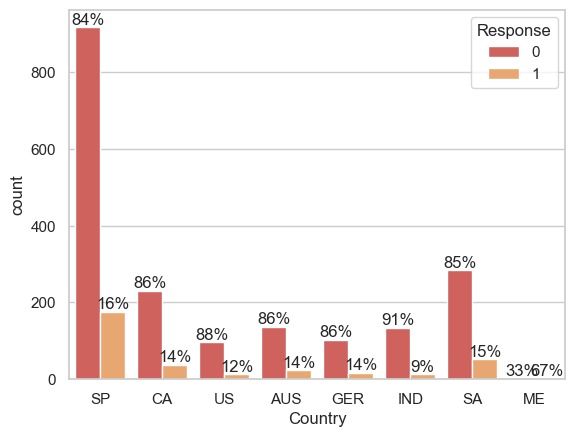

In [321]:
ax = sns.countplot(data=df, x='Country', hue='Response')
barPercentage(df, 'Country', ax)

**Conclusion**

Mexico dan Spain adalah negara yang cenderung menerima penawaran campaign terbaru

# Preprocessing

## Splitting Data

In [322]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

In [323]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [324]:
df_train.shape, df_val.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [325]:
f'{df_train.shape[0]/df.shape[0]:.2f}', f'{df_val.shape[0]/df.shape[0]:.2f}', f'{df_test.shape[0]/df.shape[0]:.2f}'

('0.60', '0.20', '0.20')

- Data processing dulu => data splitting = berpotensi menyebabkan data leakage

**better option**

- data splitting dulu => data processing

## Preprocessing

### Train

In [326]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

In [327]:
df_train['Income']=df_train['Income'].fillna(df_train['Income'].median())

In [328]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)

In [329]:
df_train['Age_Customer'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']

In [330]:
df_train['Education'] = df_train['Education'].apply(lambda x: 'Master' if str(x) in ['2n Cycle'] else str(x))

In [331]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'Absurd', 'YOLO'] else str(x))

In [332]:
# Melihat jumlah tanggunan (anak)
df_train['NumberOfDependents'] = df_train['Kidhome'] + df_train['Teenhome']

In [333]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

In [334]:
amt_spent_features = [ c for c in df_train.columns if 'Mnt' in str(c)]
df_train['Total_Amount_Spent'] = df_train[amt_spent_features].sum(axis=1)

In [335]:
purchase_features = [ c for c in df_train.columns if 'Purchases' in str(c)]
df_train['Total_purchases'] = df_train[purchase_features].sum(axis=1)

In [336]:
display(df_train.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases
0,2166,1960,Master,Widow,46779.0,1,1,2013-07-12,55,12,1,3,0,0,7,1,0,1,2,4,0,0,0,0,0,0,0,SA,53,2,7,2013,23,4
1,7297,1973,Graduation,Single,7500.0,1,0,2013-12-26,54,5,3,10,12,7,20,4,3,1,3,7,0,0,0,0,0,0,0,SA,40,1,12,2013,57,11
2,7186,1966,PhD,Together,30843.0,1,1,2014-05-26,43,24,0,2,0,0,9,2,1,1,2,5,1,0,0,0,0,0,0,IND,48,2,5,2014,35,6
3,9973,1963,Graduation,Married,50437.0,0,2,2012-10-17,28,370,9,92,6,9,4,3,7,1,8,7,0,0,0,0,0,0,0,SP,49,2,10,2012,490,19
4,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,1,8,3,2,1,1,0,2,7,0,0,0,0,0,0,0,SA,23,1,4,2014,14,4


### Valid

In [337]:
df_val.columns = df_val.columns.str.replace(' ', '')
df_val['Income'] = df_val['Income'].str.replace('$', '')
df_val['Income'] = df_val['Income'].str.replace(',', '')
df_val['Income'] = df_val['Income'].astype('float')
df_val['Dt_Customer'] = pd.to_datetime(df_val['Dt_Customer'])

In [338]:
df_val['Income']=df_val['Income'].fillna(df_val['Income'].median())

In [339]:
df_val = df_val[df_val['Year_Birth'] > 1900].reset_index(drop=True)

In [340]:
df_val['Age_Customer'] = df_val['Dt_Customer'].dt.year - df_val['Year_Birth']

In [341]:
df_val['Education'] = df_val['Education'].apply(lambda x: 'Master' if str(x) in ['2n Cycle'] else str(x))

In [342]:
df_val['Marital_Status'] = df_val['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'Absurd', 'YOLO'] else str(x))

In [343]:
# Melihat jumlah tanggunan (anak)
df_val['NumberOfDependents'] = df_val['Kidhome'] + df_val['Teenhome']

In [344]:
df_val['Dt_Customer_Month'] = df_val['Dt_Customer'].dt.month
df_val['Dt_Customer_Year'] = df_val['Dt_Customer'].dt.year

In [345]:
df_val['Total_Amount_Spent'] = df_val[amt_spent_features].sum(axis=1)

In [346]:
df_val['Total_purchases'] = df_val[purchase_features].sum(axis=1)

In [347]:
display(df_val.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases
0,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,SP,43,0,5,2014,8,15
1,6071,1989,Graduation,Single,81217.0,0,0,2013-07-19,77,493,70,324,146,40,84,1,3,7,11,1,0,0,0,0,0,0,0,SP,24,0,7,2013,1157,22
2,4066,1978,Master,Divorced,21282.0,1,0,2014-05-11,76,1,5,8,4,8,20,2,2,1,2,6,0,0,0,0,0,0,0,SP,36,1,5,2014,46,7
3,7214,1957,Graduation,Married,62187.0,0,0,2013-07-05,49,792,0,275,45,45,126,1,4,8,5,3,0,0,0,0,0,0,0,SP,56,0,7,2013,1283,18
4,10001,1985,Master,Together,7500.0,1,0,2012-08-01,98,5,17,17,13,14,34,4,2,1,3,9,0,0,0,0,0,0,0,SP,27,1,8,2012,100,10


### Test

In [348]:
df_test.columns = df_test.columns.str.replace(' ', '')
df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [349]:
df_test['Income']=df_test['Income'].fillna(df_test['Income'].median())

In [350]:
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [351]:
df_test['Age_Customer'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [352]:
df_test['Education'] = df_test['Education'].apply(lambda x: 'Master' if str(x) in ['2n Cycle'] else str(x))

In [353]:
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'Absurd', 'YOLO'] else str(x))

In [354]:
# Melihat jumlah tanggunan (anak)
df_test['NumberOfDependents'] = df_test['Kidhome'] + df_test['Teenhome']

In [355]:
df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [356]:
df_test['Total_Amount_Spent'] = df_test[amt_spent_features].sum(axis=1)

In [357]:
df_test['Total_purchases'] = df_test[purchase_features].sum(axis=1)

In [358]:
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases
0,8779,1985,Master,Married,36145.0,1,0,2013-06-16,13,56,4,76,17,1,18,4,4,1,3,9,1,0,0,0,0,1,0,US,28,1,6,2013,172,12
1,6183,1962,Master,Married,58646.0,0,1,2013-06-10,3,62,1,44,6,5,22,1,2,1,4,4,0,0,0,0,0,0,0,GER,51,1,6,2013,140,8
2,6988,1986,Graduation,Married,71952.0,1,0,2013-01-10,93,656,80,455,52,107,93,2,8,4,8,4,1,0,1,0,0,0,0,AUS,27,1,1,2013,1443,22
3,10448,1956,Graduation,Single,46998.0,0,1,2012-10-22,55,172,41,86,45,6,27,5,5,3,5,7,1,0,0,0,0,0,0,SP,56,1,10,2012,377,18
4,524,1966,Basic,Together,22634.0,0,0,2013-01-16,47,2,23,11,8,6,46,1,2,1,2,8,0,0,0,0,0,0,0,AUS,47,0,1,2013,96,6


### Features Selection

#### Numeric Features

In [359]:
cmp_feat = [ c for c in df_train.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [ c for c in df_train.columns if 'Mnt' in str(c)]
num_feat = [ c for c in df_train.columns if 'Num' in str(c)]

In [360]:
numeric_features = ['Income', 'Kidhome', 'Teenhome','Recency','Complain','Age_Customer','NumberOfDependents','Dt_Customer_Month','Dt_Customer_Year','Total_Amount_Spent','Total_purchases']

In [361]:
all_numeric_features = numeric_features + cmp_feat + mnt_feat + num_feat

In [362]:
display(df_train[all_numeric_features].head(2))
display(df_val[all_numeric_features].head(2))
display(df_test[all_numeric_features].head(2))

,Income,Kidhome,Teenhome,Recency,Complain,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumberOfDependents
0,46779.0,1,1,55,0,53,2,7,2013,23,4,0,0,0,0,0,12,1,3,0,0,7,1,0,1,2,4,2
1,7500.0,1,0,54,0,40,1,12,2013,57,11,0,0,0,0,0,5,3,10,12,7,20,4,3,1,3,7,1


,Income,Kidhome,Teenhome,Recency,Complain,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumberOfDependents
0,1730.0,0,0,65,0,43,0,5,2014,8,15,0,0,0,0,0,1,1,3,1,1,1,15,0,0,0,20,0
1,81217.0,0,0,77,0,24,0,7,2013,1157,22,0,0,0,0,0,493,70,324,146,40,84,1,3,7,11,1,0


,Income,Kidhome,Teenhome,Recency,Complain,Age_Customer,NumberOfDependents,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumberOfDependents
0,36145.0,1,0,13,0,28,1,6,2013,172,12,1,0,0,0,0,56,4,76,17,1,18,4,4,1,3,9,1
1,58646.0,0,1,3,0,51,1,6,2013,140,8,0,0,0,0,0,62,1,44,6,5,22,1,2,1,4,4,1


#### Categoric Features

In [363]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Masih ada features categoric yang belum transformed ke angka, maka perlu preprocessing

- Education (ordinal)
- Marital_Status (nominal)
- Country (nominal)

In [364]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [365]:
all_feat = all_numeric_features + categoric_feat

In [366]:
df_final_train = df_train[all_feat]
df_final_valid = df_val[all_feat]
df_final_test = df_test[all_feat]

In [367]:
df_train.Education.unique()

array(['Master', 'Graduation', 'PhD', 'Basic'], dtype=object)

In [368]:
education = {'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}

In [369]:
df_final_train['Education'] = df_final_train['education'] = df_train['Education'].map(education)
df_final_valid['Education'] = df_final_valid['education'] = df_val['Education'].map(education)
df_final_test['Education'] = df_final_test['education'] = df_test['Education'].map(education)

In [370]:
from sklearn.feature_extraction import DictVectorizer

In [371]:
dv = DictVectorizer(sparse=False)

In [372]:
df_final_train_dict = df_final_train.to_dict(orient='records')
df_final_valid_dict = df_final_valid.to_dict(orient='records')
df_final_test_dict = df_final_test.to_dict(orient='records')

In [373]:
df_final_train_encoded = dv.fit_transform(df_final_train_dict)
df_final_valid_encoded = dv.transform(df_final_valid_dict)
df_final_test_encoded = dv.transform(df_final_test_dict)

In [374]:
df_final_train = pd.DataFrame(df_final_train_encoded, columns=dv.get_feature_names_out())
df_final_valid = pd.DataFrame(df_final_valid_encoded, columns=dv.get_feature_names_out())
df_final_test = pd.DataFrame(df_final_test_encoded, columns=dv.get_feature_names_out())


In [375]:
df_final_train

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age_Customer,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,NumberOfDependents,Recency,Teenhome,Total_Amount_Spent,Total_purchases,education
0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,2013.0,3.0,46779.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,3.0,0.0,12.0,1.0,1.0,2.0,0.0,4.0,2.0,55.0,1.0,23.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2013.0,2.0,7500.0,1.0,0.0,0.0,1.0,0.0,0.0,12.0,3.0,20.0,10.0,7.0,5.0,1.0,4.0,3.0,3.0,7.0,1.0,54.0,0.0,57.0,11.0,2.0
2,0.0,0.0,1.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2014.0,4.0,30843.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,2.0,0.0,24.0,1.0,2.0,2.0,1.0,5.0,2.0,43.0,1.0,35.0,6.0,4.0
3,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,2012.0,2.0,50437.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,9.0,4.0,92.0,9.0,370.0,1.0,3.0,8.0,7.0,7.0,2.0,28.0,2.0,490.0,19.0,2.0
4,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2014.0,1.0,26868.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,7.0,1.0,52.0,0.0,14.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1.0,0.0,0.0,1.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,2013.0,3.0,84953.0,0.0,0.0,0.0,0.0,0.0,1.0,63.0,48.0,72.0,602.0,72.0,167.0,10.0,1.0,4.0,3.0,2.0,0.0,73.0,0.0,1024.0,18.0,3.0
1340,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2014.0,4.0,45921.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0,9.0,12.0,49.0,3.0,102.0,1.0,1.0,6.0,2.0,4.0,0.0,23.0,0.0,199.0,10.0,4.0
1341,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2013.0,4.0,70116.0,0.0,0.0,1.0,0.0,0.0,0.0,95.0,44.0,29.0,603.0,58.0,707.0,8.0,1.0,12.0,2.0,1.0,0.0,73.0,0.0,1536.0,23.0,4.0
1342,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2013.0,2.0,50785.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,21.0,1.0,64.0,1.0,2.0,3.0,2.0,6.0,2.0,27.0,1.0,114.0,8.0,2.0


# Modelling

- X = Independent Variables
- y = Dependent variable

In [376]:
X_train_final = df_final_train
X_val_final = df_final_valid
X_test_final = df_final_test

In [377]:
y_train_final = df_train['Response']
y_val_final = df_val['Response']
y_test_final = df_test['Response']

## Base Model

### Logistic Regression

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [379]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [380]:
y_valid_pred = model.predict_proba(X_val_final)[:,1]

In [381]:
print('Logistic Regression Validation ROC AUC:', roc_auc_score(y_val_final, y_valid_pred).round(3))

Logistic Regression Validation ROC AUC: 0.725


### Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [384]:
y_valid_pred = model.predict_proba(X_val_final)[:,1]

In [385]:
print('Random Forest Validation ROC AUC:', roc_auc_score(y_val_final, y_valid_pred).round(3))

Random Forest Validation ROC AUC: 0.854


## Random Forest HyperParameter Tuning

In [386]:
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [387]:
grid_search = GridSearchCV(RandomForestClassifier(), 
						param_grid=param_grid) 
grid_search.fit(X_train_final, y_train_final) 
print(grid_search.best_estimator_) 


RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [397]:
model_grid = RandomForestClassifier(max_depth=9, 
									max_features=None, 
									max_leaf_nodes=9, 
									n_estimators=150) 
model_grid.fit(X_train_final, y_train_final) 
y_pred_grid = model.predict_proba(X_val_final)[:,1]
print('Random Forest HPT Validation ROC AUC:', roc_auc_score(y_val_final, y_pred_grid).round(4))


Random Forest HPT Validation ROC AUC: 1.0


## Performance Stability Check

In [389]:
X_full_train = pd.concat([X_train_final, X_val_final])
y_full_train = pd.concat([y_train_final, y_val_final])

### Random Forest

In [400]:
model_final = RandomForestClassifier(max_depth=9, 
								max_features=None, 
								max_leaf_nodes=9, 
								n_estimators=150) 
model_final.fit(X_full_train, y_full_train)
y_test_pred = model.predict_proba(X_test_final)[:,1]
print('Validation ROC AUC Stability Check:', roc_auc_score(y_val_final, y_pred_grid).round(3))

Validation ROC AUC Stability Check: 1.0


## Interpretaion

In [392]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [393]:
pip install numba --upgrade

Note: you may need to restart the kernel to use updated packages.


In [394]:
import shap

In [401]:
# Menghitung shap values
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(X_test_final)

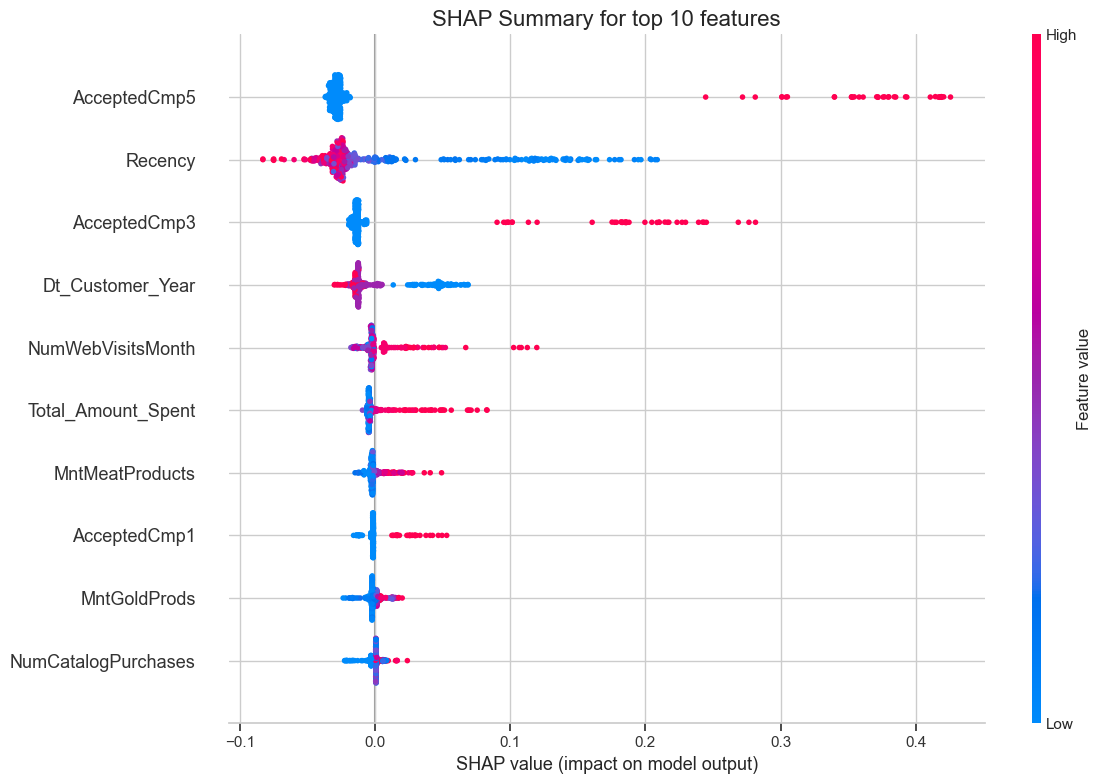

In [402]:
# Plot
plt.title('SHAP Summary for top 10 features',size=16)
shap.summary_plot(shap_values[1], X_test_final, max_display=10,plot_size=(12,8))